This notebooks simply loads a generator model and spits a series of images

In [79]:
# from __future__ import print_function
%matplotlib inline
# import argparse #generates help messages
import os
import random
import sys
import torch
import torch.nn as nn
from torchvision.utils import save_image
# import torch.nn.parallel # implements data parallelism across multiple devices/GPUs
# import torch.backends.cudnn as cudnn
# import torch.nn.functional as F
# import torch.optim as optim # optimizer for example optim.Adam([var1, var2], lr=0.0001)
# import torch.utils.data # for the dataloader class (python iterable over a dataset)
# import torchvision.datasets as dset # all datasets available in torch vision. not sure if needed here
# import torchvision.transforms as transforms # all transformations for data augmentation (pad, resize, centercrop, ...)
# import torchvision.utils as vutils # draw bounding box, segmantation mask, keypoints. convert to rgb, make grid, save_image
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import optuna
# from optuna.trial import TrialState
import logging
# from IPython.display import HTML # to embed html in the Ipython output
# import datetime
# import mlflow

logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(filename='../reports/MVPOptimizer.log') 

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

%load_ext autoreload
%autoreload 2

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


Random Seed:  999
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Load Model

In [70]:
src = '../models/MVPBestGenerator'

In [71]:
sys.path.insert(0,"..")

In [72]:
from src.models.Generator import OptGen

In [73]:
GNet = torch.load(src)

In [25]:
b_size = 64
nz = 100
ngpu = torch.cuda.device_count()
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [26]:
# Generate batch of latent vectors
noise = torch.randn(b_size, nz, 1, 1, device=device)
# Generate fake image batch with G
fake = GNet(noise).detach().cpu()

In [39]:
fake.shape

torch.Size([64, 3, 64, 64])

[10]

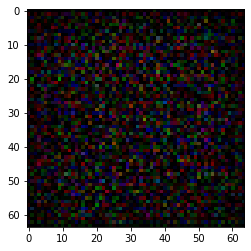

In [69]:
i = random.sample(range(b_size), 1)
plt.imshow(fake[i][0].permute(1,2,0));

In [82]:
fake[i][0].shape

torch.Size([3, 64, 64])

In [83]:
fake[i][0].permute(1,2,0).shape

torch.Size([64, 64, 3])

In [84]:
save_image(fake[i][0], 'img1.png')

In [86]:
10%3

1